In [341]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import h5py

from shapely.geometry import Polygon
import contextily as ctx

from ast import literal_eval

from modules.data_aggregation.satellite_data import create_gdf, export_gdf, import_gdf_from_shp

from modules.data_aggregation.params import CITY_BOUNDING_BOXES
from modules.ml_logic.utils import slice_picture_coords, get_sub_tile

# Importing processed satellite data

In [343]:
# import GeoDataFrame
gdf_Paris_import = import_gdf_from_shp("Paris")

KeyboardInterrupt: 

In [ ]:
gdf_Paris_import

,LST,ele,LST_diff,ele_diff,ul_corner,ll_corner,lr_corner,ur_corner,bb,geometry
0,28.489990,45.577309,-2.315979,-28.184334,"[[2.2633263464873545, 48.81321032181281]]","[[2.2633263464873545, 48.813839888049166]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2639559127237074, 48.81321032181281]]","[[2.2633263464873545, 48.81321032181281], [2.2...","POLYGON ((2.26333 48.81321, 2.26333 48.81384, ..."
1,28.549988,45.577431,-2.255981,-28.184212,"[[2.2639559127237074, 48.81321032181281]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2645854789600603, 48.81321032181281]]","[[2.2639559127237074, 48.81321032181281], [2.2...","POLYGON ((2.26396 48.81321, 2.26396 48.81384, ..."
2,28.450012,46.947140,-2.355957,-26.814503,"[[2.2645854789600603, 48.81321032181281]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2652150451964133, 48.813839888049166]]","[[2.2652150451964133, 48.81321032181281]]","[[2.2645854789600603, 48.81321032181281], [2.2...","POLYGON ((2.26459 48.81321, 2.26459 48.81384, ..."
3,29.230011,48.411678,-1.575958,-25.349964,"[[2.2652150451964133, 48.81321032181281]]","[[2.2652150451964133, 48.813839888049166]]","[[2.265844611432766, 48.813839888049166]]","[[2.265844611432766, 48.81321032181281]]","[[2.2652150451964133, 48.81321032181281], [2.2...","POLYGON ((2.26522 48.81321, 2.26522 48.81384, ..."
4,27.889984,48.643574,-2.915985,-25.118069,"[[2.265844611432766, 48.81321032181281]]","[[2.265844611432766, 48.813839888049166]]","[[2.266474177669119, 48.813839888049166]]","[[2.266474177669119, 48.81321032181281]]","[[2.265844611432766, 48.81321032181281], [2.26...","POLYGON ((2.26584 48.81321, 2.26584 48.81384, ..."
...,...,...,...,...,...,...,...,...,...,...
35023,34.149994,67.602211,3.344025,-6.159431,"[[2.4188292068665307, 48.90009046242952]]","[[2.4188292068665307, 48.90072002866587]]","[[2.4194587731028836, 48.90072002866587]]","[[2.4194587731028836, 48.90009046242952]]","[[2.4188292068665307, 48.90009046242952], [2.4...","POLYGON ((2.41883 48.90009, 2.41883 48.90072, ..."
35024,33.750000,68.582405,2.944031,-5.179237,"[[2.4194587731028836, 48.90009046242952]]","[[2.4194587731028836, 48.90072002866587]]","[[2.4200883393392365, 48.90072002866587]]","[[2.4200883393392365, 48.90009046242952]]","[[2.4194587731028836, 48.90009046242952], [2.4...","POLYGON ((2.41946 48.90009, 2.41946 48.90072, ..."
35025,33.750000,68.582405,2.944031,-5.179237,"[[2.4200883393392365, 48.90009046242952]]","[[2.4200883393392365, 48.90072002866587]]","[[2.4207179055755894, 48.90072002866587]]","[[2.4207179055755894, 48.90009046242952]]","[[2.4200883393392365, 48.90009046242952], [2.4...","POLYGON ((2.42009 48.90009, 2.42009 48.90072, ..."
35026,32.690002,70.776123,1.884033,-2.985519,"[[2.4207179055755894, 48.90009046242952]]","[[2.4207179055755894, 48.90072002866587]]","[[2.4213474718119423, 48.90072002866587]]","[[2.4213474718119423, 48.90009046242952]]","[[2.4207179055755894, 48.90009046242952], [2.4...","POLYGON ((2.42072 48.90009, 2.42072 48.90072, ..."


In [ ]:
# import DataFrame
df_Paris_import = pd.read_csv('../../data/processed_data/Paris/Paris.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df_Paris_import.bb.apply(literal_eval)[23289]

[[2.3294308013044134, 48.87113041555728],
 [2.3294308013044134, 48.87175998179364],
 [2.3300603675407663, 48.87175998179364],
 [2.3300603675407663, 48.87113041555728]]

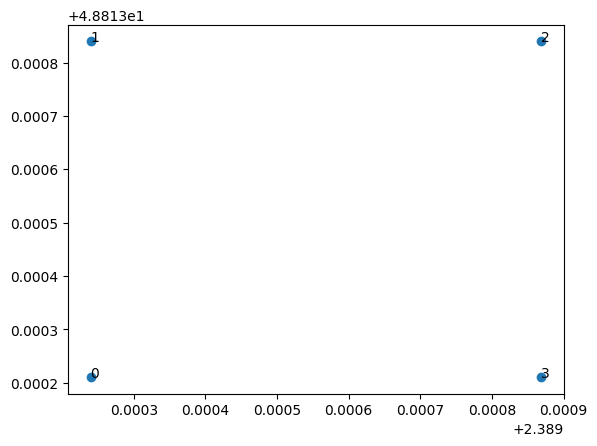

In [ ]:
first_pixel = df_Paris_import.bb.apply(literal_eval)[200]
fig, ax = plt.subplots()

ax.scatter(np.array(first_pixel)[:,0], np.array(first_pixel)[:,1])

for i in range(4):
    ax.annotate(i, first_pixel[i])

In [ ]:
# basic info

print(f"mean temp: {gdf_Paris_import.LST.mean()}, mean elevation: {gdf_Paris_import.ele.mean()}")
print(f"mean diff temp: {gdf_Paris_import.LST_diff.mean()}, mean diff elevation: {gdf_Paris_import.ele_diff.mean()}")
print(f"min temp: {gdf_Paris_import.LST.min()}, min elevation: {gdf_Paris_import.ele.min()}")
print(f"max temp: {gdf_Paris_import.LST.max()}, max elevation: {gdf_Paris_import.ele.max()}")
print(f"min diff temp: {gdf_Paris_import.LST_diff.min()}, min diff elevation: {gdf_Paris_import.ele_diff.min()}")
print(f"max diff temp: {gdf_Paris_import.LST_diff.max()}, max diff elevation: {gdf_Paris_import.ele_diff.max()}")


mean temp: 30.805967938400396, mean elevation: 73.76163836038451
mean diff temp: -1.2998808542451752e-06, mean diff elevation: -4.095670171452124e-06
min temp: 19.07000732421875, min elevation: 45.577308654785156
max temp: 41.329986572265625, max elevation: 135.3814697265625
min diff temp: -11.7359619140625, min diff elevation: -28.18433380126953
max diff temp: 10.524017333984375, max diff elevation: 61.61982727050781


# Importing raw satellite data 
has to be downloaded in '../../data/raw_data/{city_name}/*.h5'

In [ ]:
# two different L2 files containing LST
lst_raw = h5py.File('../../data/raw_data/Paris/ECOSTRESS_L2_LSTE_23097_002_20220802T145219_0601_02.h5', 'r')

# L1 fille containing GPS coordinates
geo_raw = h5py.File('../../data/raw_data/Paris/ECOSTRESS_L1B_GEO_23097_002_20220802T145219_0601_01.h5', 'r')

# Creating processed data
(if raw data availabe)

In [ ]:
# create GeoDataFrame
gdf_Paris = create_gdf("Paris")

KeyboardInterrupt: 

In [ ]:
gdf_Paris[1]['bb'][0]

[[2.2633263464873545, 48.81321032181281],
 [2.2633263464873545, 48.813839888049166],
 [2.2639559127237074, 48.813839888049166],
 [2.2639559127237074, 48.81321032181281]]

In [ ]:
gdf_Paris[1]['bb'][0]

[[2.2639559127237074, 48.81321032181281],
 [2.2639559127237074, 48.813839888049166],
 [2.2633263464873545, 48.813839888049166],
 [2.2633263464873545, 48.81321032181281]]

In [ ]:
# create & export GeoDataFrame
export_gdf("Paris")

# Plotting

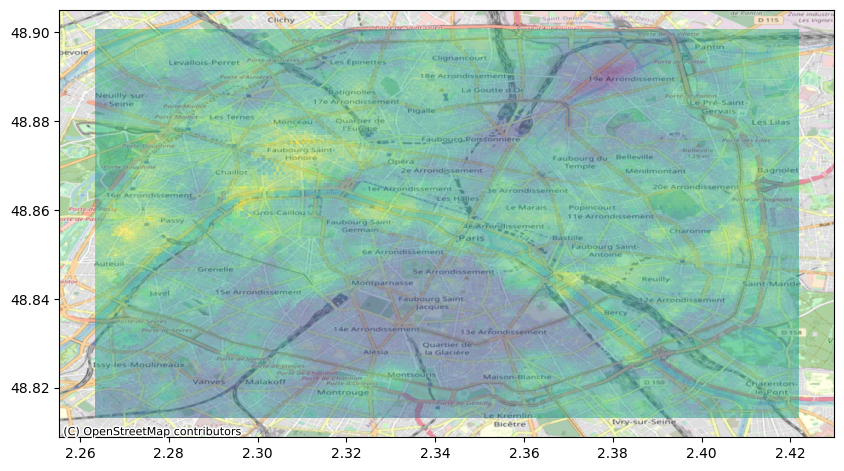

In [ ]:
fig, ax = plt.subplots(figsize = (10,15))
gdf_Paris_import.plot(column = 'LST', ax = ax, alpha = .5)
ctx.add_basemap(ax,  crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# Slicing of image

In [ ]:
slice_coords = slice_picture_coords(CITY_BOUNDING_BOXES['Paris'], 19)
len(slice_coords)

361

In [ ]:
tile_1 = get_sub_tile(gdf_Paris_import, slice_coords, image_number = 1)
tile_2 = get_sub_tile(gdf_Paris_import, slice_coords, image_number = 2)
print('number of pixels per tile:', len(tile_1))

number of pixels per tile: 91


<AxesSubplot: >

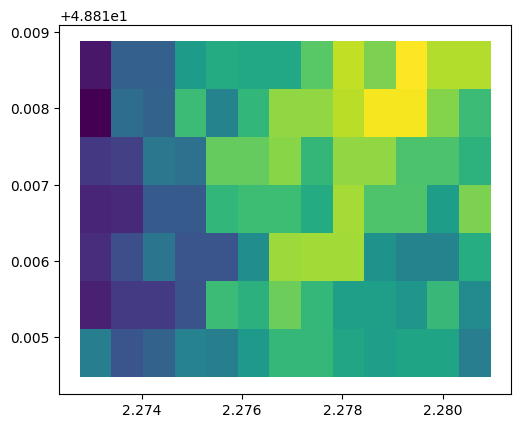

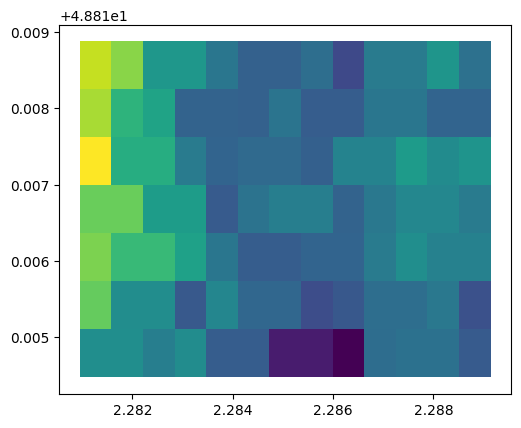

In [ ]:
tile_1.plot(column = 'LST_diff')
tile_2.plot(column = 'LST_diff')

In [ ]:
all_tiles = [get_sub_tile(gdf_Paris_import, slice_coords, i) for i in range(50)]

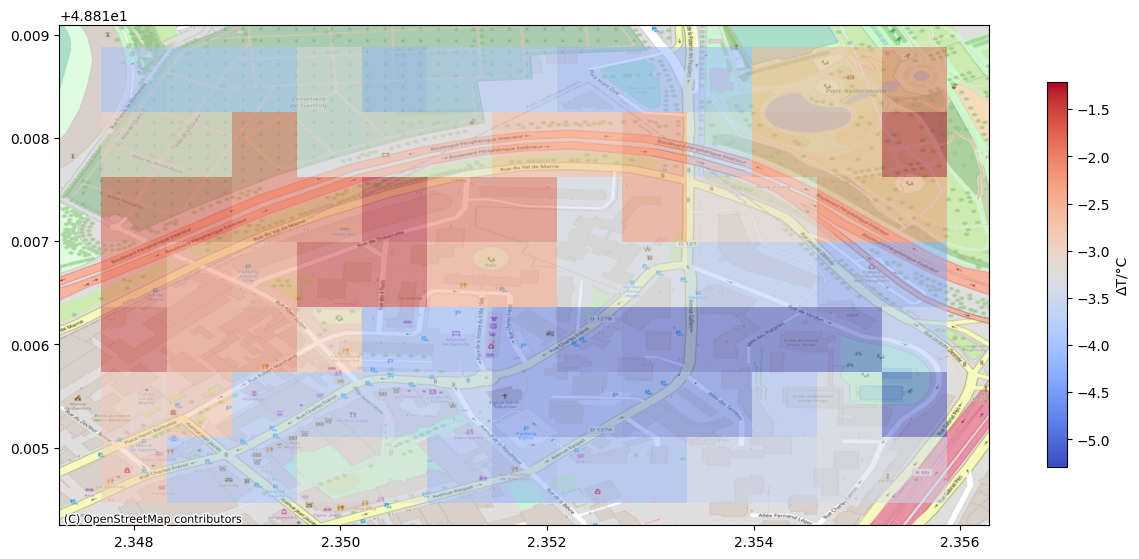

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
all_tiles[10].plot(column = 'LST_diff', ax = ax, alpha = .5, cmap = 'coolwarm',\
    legend = True,legend_kwds={'shrink': 0.5, 'label': 'ΔT/°C'})
ctx.add_basemap(ax,  crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

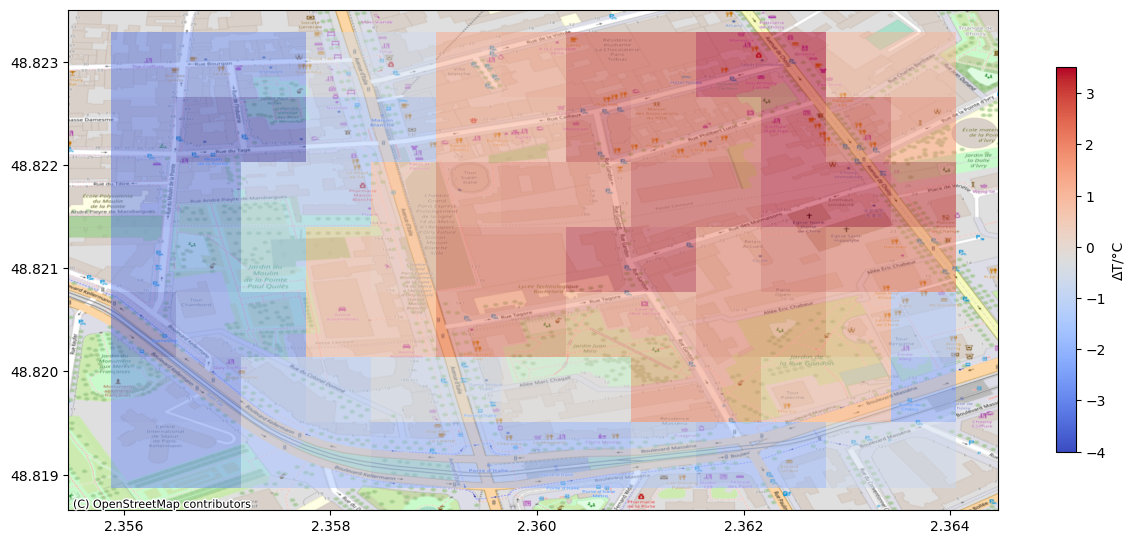

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
all_tiles[30].plot(column = 'LST_diff', ax = ax, alpha = .5, cmap = 'coolwarm',\
    legend = True,legend_kwds={'shrink': 0.5, 'label': 'ΔT/°C'})
ctx.add_basemap(ax,  crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

## Export numpy array with all tiles

In [ ]:
df_Paris_import.drop(columns=['LST', 'ele','ll_corner','lr_corner', 'ur_corner', 'bb'])

,LST_diff,ele_diff,ul_corner
0,-2.315979,-28.184334,"[[2.2633263464873545, 48.81321032181281]]"
1,-2.255981,-28.184212,"[[2.2639559127237074, 48.81321032181281]]"
2,-2.355957,-26.814503,"[[2.2645854789600603, 48.81321032181281]]"
3,-1.575958,-25.349964,"[[2.2652150451964133, 48.81321032181281]]"
4,-2.915985,-25.118069,"[[2.265844611432766, 48.81321032181281]]"
...,...,...,...
35023,3.344025,-6.159432,"[[2.4188292068665307, 48.90009046242952]]"
35024,2.944031,-5.179237,"[[2.4194587731028836, 48.90009046242952]]"
35025,2.944031,-5.179237,"[[2.4200883393392365, 48.90009046242952]]"
35026,1.884033,-2.985519,"[[2.4207179055755894, 48.90009046242952]]"


In [ ]:
len(df_Paris_import)/25**2

56.0448

In [ ]:
slice_coords = slice_picture_coords(CITY_BOUNDING_BOXES['Paris'], 25, overlap_percent=0)
len(get_sub_tile(gdf_Paris_import, slice_coords, -1))

50

In [ ]:
def slice_picture_coords(full_coords: list, num_pixel_lon: int, num_pixel_lat: int, overlap_percent: int = 0) -> list:
    """
    description:
    returns a list of length scaling_factor^2
    of coordinates of the slices in format: [[lon,lon+lon_step], [lat,lat+lat_step]]

    input:
    bounding box full_coords = [[lon_1, lon_2], [lat_1, lat_2]],
    scaling_factor: number of divisions in lon and lat
    overlap_percent: percentage of overlap between individual tiles

    output:
    list of [[lon,lon+lon_step], [lat,lat+lat_step]]

    usage: slice_picture_coords(CITY_BOUNDING_BOXES['Paris'], 100)
    """

    # flatten bb cooordinates
    lon1, lon2, lat1, lat2 = [item for sublist in full_coords for item in sublist]

    # lat and lon distance
    lat_dist = abs(lat1 - lat2)
    lon_dist = abs(lon1 - lon2)

    # step width
    lat_step = lat_dist/scaling_factor
    lon_step = lon_dist/scaling_factor

    # overlap in lon, lat
    lat_overlap = overlap_percent/100 * lat_step
    lon_overlap = overlap_percent/100 * lon_step

    # create coordinates of tiles
    tiles_coords = [[[lon,lon+lon_step], [lat,lat+lat_step]] for lat in np.arange(lat1,lat2, lat_step-lat_overlap) \
        for lon in np.arange(lon1,lon2, lon_step-lon_overlap)]

    return tiles_coords

In [ ]:
def get_px_size(ul_corner_lat: np.array, ul_corner_lon: np.array):
    """
    returns the pixel size lon, lat
    """
    diff = lambda x, i: x[i+1] - x[i]
    
    max_size_lat = np.max([diff(ul_corner_lat,i) for i in range(len(ul_corner_lat)-1) if diff(ul_corner_lat,i)>0])
    max_size_lon = np.max([diff(ul_corner_lon,i) for i in range(len(ul_corner_lon)-1) if diff(ul_corner_lon,i)>0])
    
    return max_size_lat, max_size_lon

In [ ]:
# convert imported upper left corner str into list
ul_import = df_Paris_import.ul_corner.apply(literal_eval)

# divide ul_corner into lists of lat and lon
ul_lat = np.array([ul[0] for ul in ul_import])[:,0]
ul_lon = np.array([ul[0] for ul in ul_import])[:,1]

get_px_size(ul_lat, ul_lon)

(0.0006295662363537957, 0.0006295662363555721)

In [370]:
def get_all_sub_coords(full_df: pd.DataFrame, num_px_lon: int, num_px_lat: int) -> pd.DataFrame:
    """
    description:
    returns the sub image according to the smaller
    tile coordinates

    input:
    full_df: full original dataframe
    tiles_coords: coordinates of all subtiles from slice_picture_coords()
    image_number: number of image to return

    output:
    returns the image_number-th subtile dataframe
    """
    
    # drop irrelavant features
    full_df.drop(columns=['LST', 'ele','ll_corner', 'ur_corner', 'bb'])
    
    
    # convert imported upper left corner str into list
    ul_import = full_df.ul_corner.apply(literal_eval)
    lr_import = full_df.lr_corner.apply(literal_eval)

    # divide ul_corner into lists of lat and lon
    ul_lat = np.array([ul[0] for ul in ul_import])[:,0]
    ul_lon = np.array([ul[0] for ul in ul_import])[:,1]
    
    # divide lr_corner into lists of lat and lon
    lr_lat = np.array([lr[0] for lr in lr_import])[:,0]
    lr_lon = np.array([lr[0] for lr in lr_import])[:,1]
    
    total_num_tiles = int(len(full_df)/(num_px_lon* num_px_lat))
    
    tiles_coords = []
    
    for i in range(total_num_tiles):
        
        # get pixel size
        lat_size, lon_size = lr_lat[i] - ul_lat[i], lr_lon[i] - ul_lon[i]
        
        # step size
        step_lat = num_px_lat * lat_size
        step_lon = num_px_lon * lon_size

        
        # divide slice_coords into lists of lat and lon
        slice_bound_lat = [ul_lat[i], ul_lat[i] + step_lat]
        slice_bound_lon = [ul_lon[i], ul_lon[i] + step_lon]
    
        tiles_coords.append([slice_bound_lat, slice_bound_lon])
        
        
    return tiles_coords

In [371]:
tile_coords = get_all_sub_coords(df_Paris_import, 10, 6)

583


In [376]:
len(tile_coords), tile_coords[0]

(583,
 [[2.2633263464873545, 2.267103743905472],
  [48.81321032181281, 48.81950598417637]])

In [373]:
from modules.ml_logic.utils import get_sub_tile

In [380]:
subtiles = [get_sub_tile(gdf_Paris_import, tile_coords, i) for i in range(0, len(tile_coords))]

In [ ]:
def export_array_subslices(data: pd.DataFrame, number_divisions: int, city: str) -> np.array:
    """
    returns and exports one array containing sub-arrays of all sub-tiles
    """
    
    # drop irrelavant features
    data.drop(columns=['LST', 'ele','ll_corner','lr_corner', 'ur_corner', 'bb'])
    
    # slice coords
    slice_coords = slice_picture_coords(CITY_BOUNDING_BOXES[city], number_divisions)
    
    # get all tiles
    all_tiles = [get_sub_tile(gdf_Paris_import, slice_coords, i) for i in range(50)]
    
    # [print(all_tiles.index(tile), len(tile)) for tile in all_tiles if len(tile) > 50]
    
    return all_tiles

In [ ]:
subtiles = export_array_subslices(gdf_Paris_import, 25, "Paris")

<AxesSubplot: >

<Figure size 1200x700 with 0 Axes>

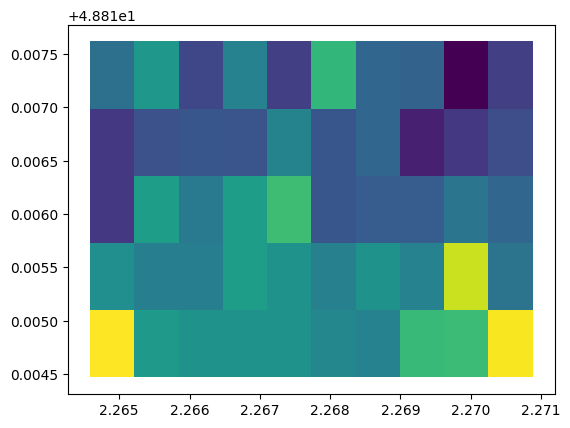

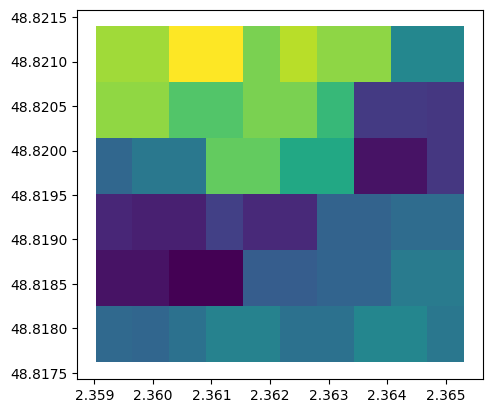

In [ ]:
plt.figure(figsize = (12,7))
subtiles[0].plot(column = 'LST_diff')
subtiles[40].plot(column = 'LST_diff')

## Slicing with overlap

In [ ]:
# overlap of 20 percent of small tiles
slice_coords = slice_picture_coords(CITY_BOUNDING_BOXES['Paris'], 19, 20)
len(slice_coords)

576

In [ ]:
slice_coords[0]

[[2.264216, 2.2725056842105262], [48.813898, 48.81845610526316]]

In [ ]:
# Compute all possible permutations
def perm(ndim_list):
    """
    returns all permutations of sublist elements
    """
    if len(ndim_list) == 1:
        res = ndim_list
    else:
        if len(ndim_list) == 2:
            res = [[i, j] for i in ndim_list[0] for j in ndim_list[1]]
        elif len(ndim_list) == 3:
            res = [[i, j, k] for i in ndim_list[0] for j in ndim_list[1] for k in ndim_list[2]]
        else:
            res = [[i, j, k, l] for i in ndim_list[0] for j in ndim_list[1] for k in ndim_list[2] for l in ndim_list[3]]
    return res

In [ ]:
def get_correct_odering(list):
    """
    returns correct order of coords for
    Polygon
    """
    p1, p2 = list[2:4]
    list[2], list[3] = p2, p1
    
    return list

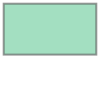

In [ ]:
Polygon(get_correct_odering(perm(slice_coords[0])))

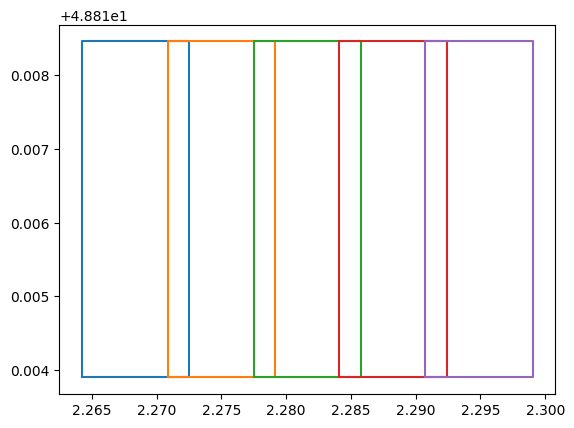

In [ ]:
max_tiles = 5
corner_coords = [get_correct_odering(perm(slice_coords[i])) for i in range(max_tiles)]

x_coords = [np.array(corner_coords)[i,:,0] for i in range(max_tiles)]
y_coords = [np.array(corner_coords)[i,:,1] for i in range(max_tiles)]

for i in range(max_tiles):
    plt.plot(np.append(x_coords[i],x_coords[i][0]),  np.append(y_coords[i],y_coords[i][0]))
